# Gradient descent with learning rate scheduling.

## Needed Libraries import

In [457]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import OptimizeResult

## Helper functions for plots and output formatting


In [458]:
def plot(func, results_list, grid):
    if not isinstance(results_list, list):
        results_list = [results_list]

    x, y = np.meshgrid(np.linspace(grid[0], grid[1], 200), np.linspace(grid[0], grid[1], 200))

    z = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = func((x[i, j], y[i, j]))

    plt.figure()
    plt.contour(x, y, z, levels=30)

    for res in results_list:
        path = res.x_history
        plt.plot(path[:, 0], path[:, 1], label="GD path", marker='o')
        plt.plot(path[-1, 0], path[-1, 1], 'x', markersize=10)

    plt.xlim(grid)
    plt.ylim(grid)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


def print_output(init, gd, method, func, grad, optimum, grid=(-6, 6)):
    res = gd(func, grad, init)
    error = np.linalg.norm(res.x - optimum)

    print(f"{'=' * 90}")
    print(f"Method: {method}")
    print(f"Function: (x - 3)^2 + (y + 2)^2")
    print(f"Initial point: {init}")
    print(f"Real minimum: (3.0, -2.0)")
    print(f"{'=' * 90}")
    print(f"{'Method':<15} {'Found point':<20} {'f(x)':<10} {'Iterations':<15} {'Evals':<12} {'Error':<10}")
    print(f"{'-' * 90}")
    print(
        f"{'Stat':<15} ({res.x[0]:.3f}, {res.x[1]:.3f}) {" ":<5} {res.fun:<13.3f} {res.nit:<13} {res.nfev:<10} {error:<10.6f}")
    print(f"{'=' * 90}")

    plot(func, res, grid)

## Function for research

### Symmetrical parabola

In [459]:
def func_sp(point):
    x, y = point
    return (x - 3) ** 2 + (y + 2) ** 2


def grad_sp(point):
    x, y = point
    return np.array([2 * (x - 3), 2 * (y + 2)])

### Rotated elliptical function

In [460]:
def func_re(point):
    x, y = point
    return (2 * (x + 2) ** 2) + (4 * x * y) + (3 * (y - 4) ** 2)


def grad_re(point):
    x, y = point
    return np.array([4 * (x + 2) + 4 * y, 4 * x + 6 * (y - 4)])

### Elliptical function with scale

In [461]:
def func_es(point):
    x, y = point
    return (8 * (x - 3) ** 2) + ((y + 1) ** 2)


def grad_es(point):
    x, y = point
    return np.array([16 * (x - 3), 2 * (y + 1)])

## Gradient Descent implementations with different schedules

### General gradient descent implementation

In [462]:
def gd_lrs(f, grad_f, x0, learning_rate_schedule, tol=1e-6, max_iter=10000):
    nit = 0
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]
    for nit in range(max_iter):
        lr = learning_rate_schedule(nit)
        grad = grad_f(x)
        x -= lr * grad
        x_history.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return OptimizeResult(x=x, fun=f(x), nit=nit + 1, nfev=nit + 1, x_history=np.array(x_history))

### Step Decay

In [463]:
def step_decay(init, drop_rate, step_size, nit):
    return init * (drop_rate ** (nit // step_size))

### Exponential Decay

In [464]:
def exponential_decay(init, decay_rate, nit):
    return init * np.exp(-decay_rate * nit)

### Cosine Annealing

In [465]:
def cosine_annealing(init, nit, lr_max, eta_min=0):
    return eta_min + (init - eta_min) * (1 + np.cos(np.pi * nit / lr_max)) / 2

## Results

### Symmetrical parabola: $(x - 3)^2 + (y + 2)^2$

### Step decay

Method: GD step decay
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 2]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (2.959, -1.946)       0.005         10000         10000      0.067694  


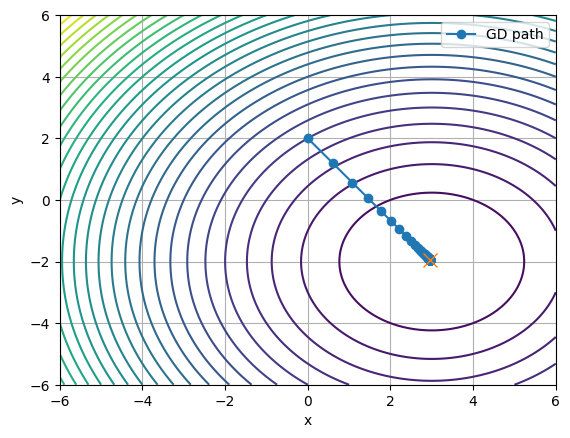

In [466]:
print_output(
    [0, 2],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: step_decay(0.1, 0.5, 10, k),
                                   **kwargs),
    "GD step decay",
    func_sp,
    grad_sp,
    [3, -2])

### Exponential decay

Method: GD exponential decay
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 2]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -2.000)       0.000         140           140        0.000000  


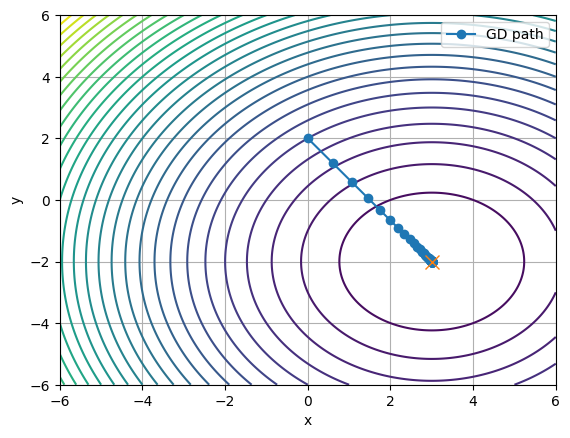

In [467]:
print_output(
    [0, 2],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: exponential_decay(0.1, 0.01, k),
                                   **kwargs),
    "GD exponential decay",
    func_sp,
    grad_sp,
    [3, -2])

### Cosine Annealing

Method: GD cosine annealing
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 2]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -2.000)       0.000         162           162        0.000000  


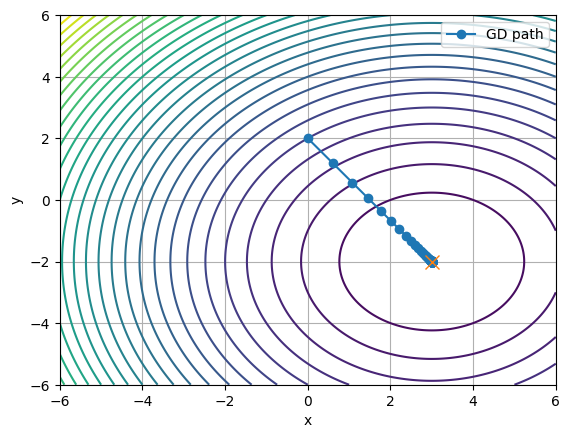

In [468]:
print_output(
    [0, 2],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: cosine_annealing(0.1, k, 100,
                                                                                     eta_min=0.01),
                                   **kwargs),
    "GD cosine annealing",
    func_sp,
    grad_sp,
    [3, -2])

### Rotated elliptical function: $2(x + 2)^2 + 4xy + 3(y - 4)^2$

### Step decay

Method: GD step decay
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 1]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      389           389        0.000001  


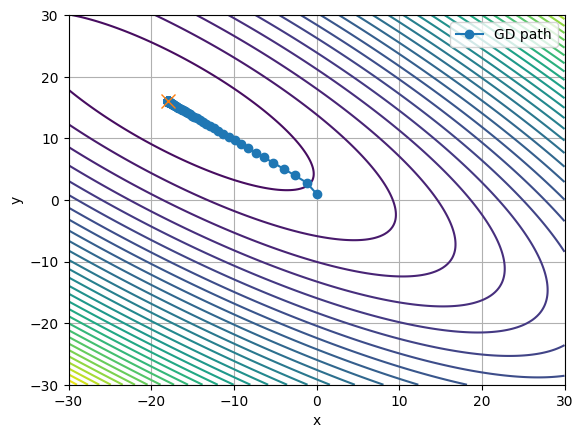

In [469]:
print_output(
    [0, 1],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: step_decay(0.1, 0.5, 100, k),
                                   **kwargs),
    "GD step decay",
    func_re,
    grad_re,
    [-18, 16],
    [-30, 30])

### Exponential decay

Method: GD exponential decay
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 1]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-17.998, 15.998)       -208.000      10000         10000      0.002847  


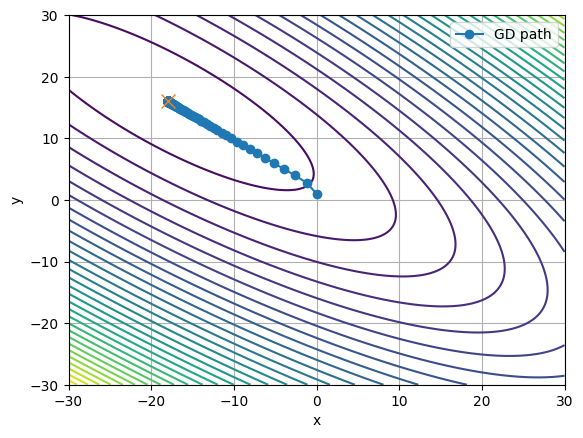

In [470]:
print_output(
    [0, 1],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: exponential_decay(0.1, 0.01, k),
                                   **kwargs),
    "GD exponential decay",
    func_re,
    grad_re,
    [-18, 16],
    [-30, 30])

### Cosine Annealing

Method: GD cosine annealing
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 1]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      364           364        0.000001  


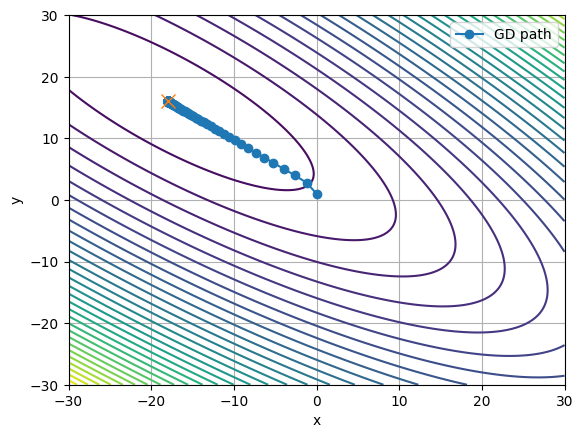

In [471]:
print_output(
    [0, 1],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: cosine_annealing(0.1, k, 100,
                                                                                     eta_min=0.01),
                                   **kwargs),
    "GD cosine annealing",
    func_re,
    grad_re,
    [-18, 16],
    [-30, 30])

### Elliptical function with scale: $8(x - 3)^2 + (y + 1)^2$

### Step decay

Method: GD step decay
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 2]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -0.959)       0.002         10000         10000      0.040616  


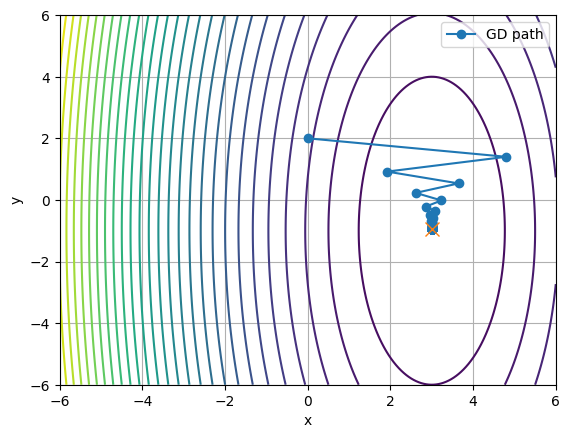

In [472]:
print_output(
    [0, 2],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: step_decay(0.1, 0.5, 10, k),
                                   **kwargs),
    "GD step decay",
    func_es,
    grad_es,
    [3, -1])

### Exponential decay

Method: GD exponential decay
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 2]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -1.000)       0.000         131           131        0.000000  


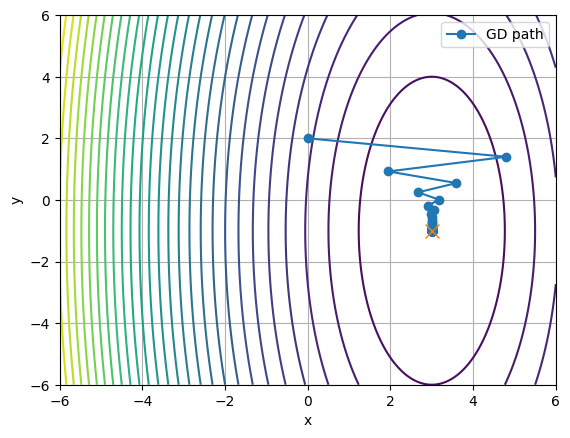

In [473]:
print_output(
    [0, 2],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: exponential_decay(0.1, 0.01, k),
                                   **kwargs),
    "GD exponential decay",
    func_es,
    grad_es,
    [3, -1])

## Cosine Annealing

Method: GD cosine annealing
Function: (x - 3)^2 + (y + 2)^2
Initial point: [0, 2]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -1.000)       0.000         159           159        0.000000  


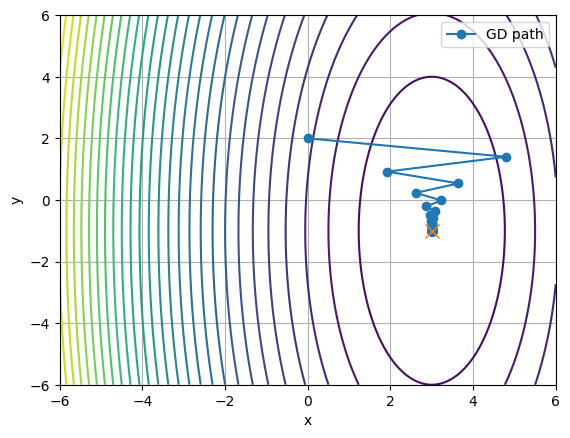

In [474]:
print_output(
    [0, 2],
    lambda *args, **kwargs: gd_lrs(*args,
                                   learning_rate_schedule=lambda k: cosine_annealing(0.1, k, 100,
                                                                                     eta_min=0.01),
                                   **kwargs),
    "GD cosine annealing",
    func_es,
    grad_es,
    [3, -1])